In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
btc = yf.Ticker('BTC-USD')
eth = yf.Ticker('ETH-USD')
bnb = yf.Ticker('BNB-USD')
sol = yf.Ticker('SOL-USD')
ada = yf.Ticker('ADA-USD')

In [4]:
btc_data = btc.history(start='2023-01-01', end='2024-12-01', interval='1d')
eth_data = eth.history(start='2023-01-01', end='2024-12-01', interval='1d')
bnb_data = bnb.history(start='2023-01-01', end='2024-12-01', interval='1d')
sol_data = sol.history(start='2023-01-01', end='2024-12-01', interval='1d')
ada_data = ada.history(start='2023-01-01', end='2024-12-01', interval='1d')

In [5]:
data = pd.DataFrame({
    'btc': btc_data['Close'], 
    'eth': eth_data['Close'], 
    'bnb': bnb_data['Close'], 
    'sol': sol_data['Close'], 
    'ada': ada_data['Close']
})

In [6]:
split_idx = int(data.shape[0] * 0.9)
train_data = data.iloc[:split_idx, :].copy()
test_data = data.iloc[split_idx:, :].copy()

In [7]:
from itertools import chain, combinations

In [8]:
items = data.columns

In [9]:
coins_list = list(chain.from_iterable(combinations(items, r) for r in range(2, len(items) + 1)))
coins_list

[('btc', 'eth'),
 ('btc', 'bnb'),
 ('btc', 'sol'),
 ('btc', 'ada'),
 ('eth', 'bnb'),
 ('eth', 'sol'),
 ('eth', 'ada'),
 ('bnb', 'sol'),
 ('bnb', 'ada'),
 ('sol', 'ada'),
 ('btc', 'eth', 'bnb'),
 ('btc', 'eth', 'sol'),
 ('btc', 'eth', 'ada'),
 ('btc', 'bnb', 'sol'),
 ('btc', 'bnb', 'ada'),
 ('btc', 'sol', 'ada'),
 ('eth', 'bnb', 'sol'),
 ('eth', 'bnb', 'ada'),
 ('eth', 'sol', 'ada'),
 ('bnb', 'sol', 'ada'),
 ('btc', 'eth', 'bnb', 'sol'),
 ('btc', 'eth', 'bnb', 'ada'),
 ('btc', 'eth', 'sol', 'ada'),
 ('btc', 'bnb', 'sol', 'ada'),
 ('eth', 'bnb', 'sol', 'ada'),
 ('btc', 'eth', 'bnb', 'sol', 'ada')]

In [10]:
len(coins_list)

26

In [11]:
26 / 2

13.0

Eigenvector for Portfolio 1 ('btc', 'eth') with 2 coins:
[ 0.00084938 -0.01559738]


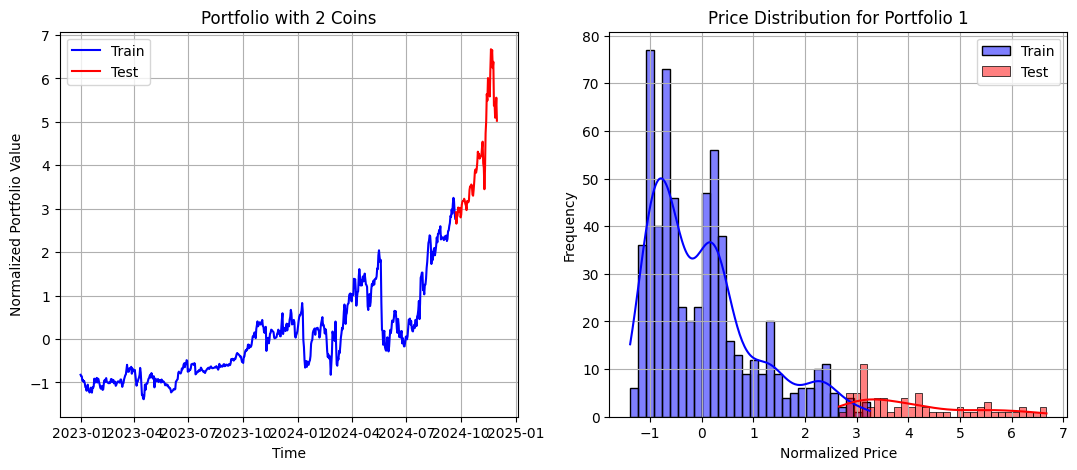

Eigenvector for Portfolio 2 ('btc', 'bnb') with 2 coins:
[ 8.39146195e-05 -1.68904517e-02]


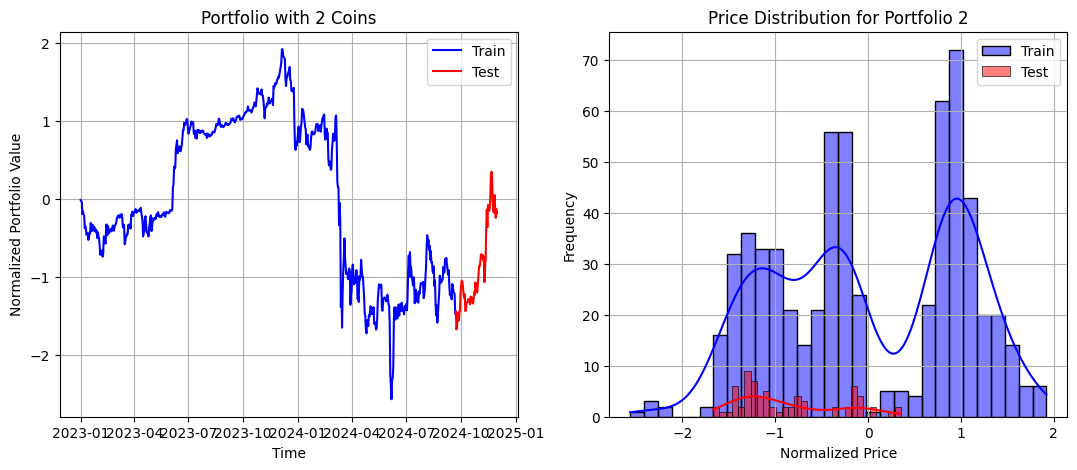

Eigenvector for Portfolio 3 ('btc', 'sol') with 2 coins:
[ 0.00065503 -0.16002882]


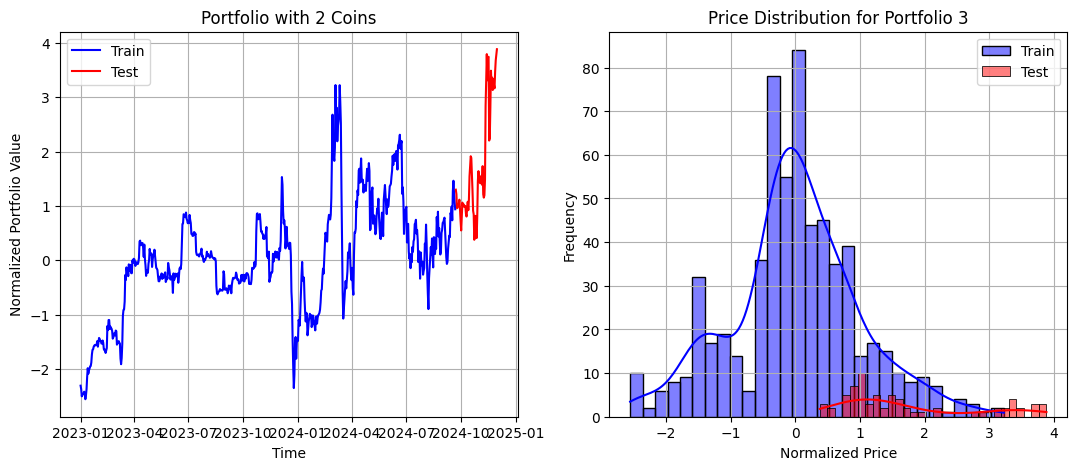

Eigenvector for Portfolio 4 ('btc', 'ada') with 2 coins:
[ 2.72562686e-04 -1.84711976e+01]


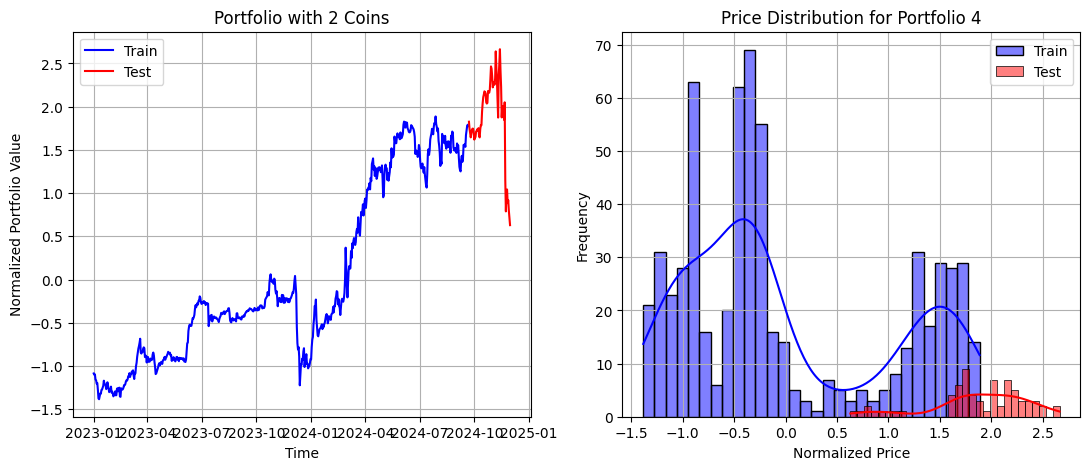

Eigenvector for Portfolio 5 ('eth', 'bnb') with 2 coins:
[ 0.00272175 -0.01962989]


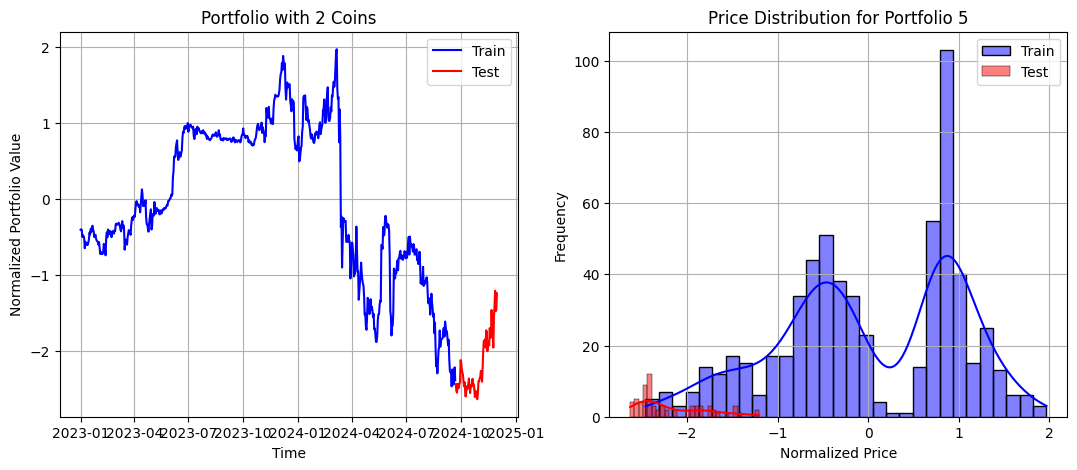

Eigenvector for Portfolio 6 ('eth', 'sol') with 2 coins:
[ 0.00852399 -0.11071937]


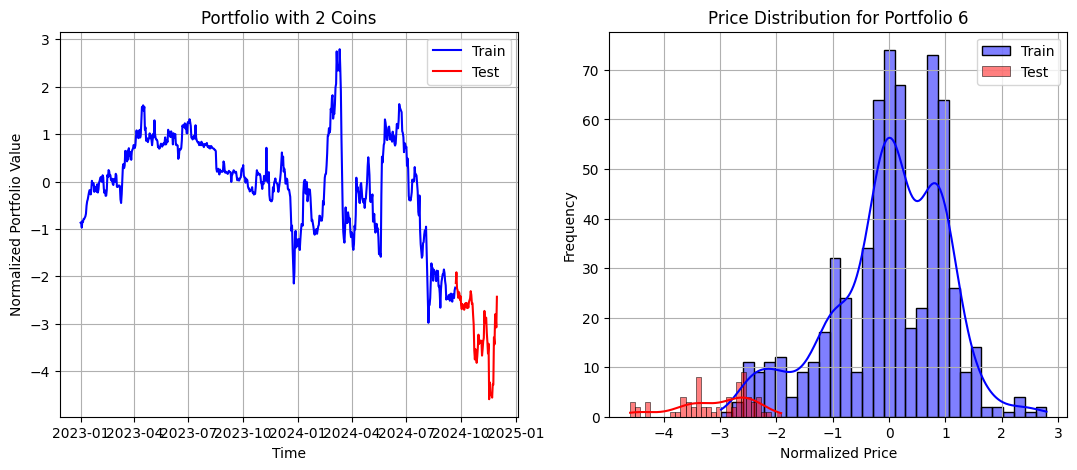

Eigenvector for Portfolio 7 ('eth', 'ada') with 2 coins:
[ 5.43966375e-03 -1.50441116e+01]


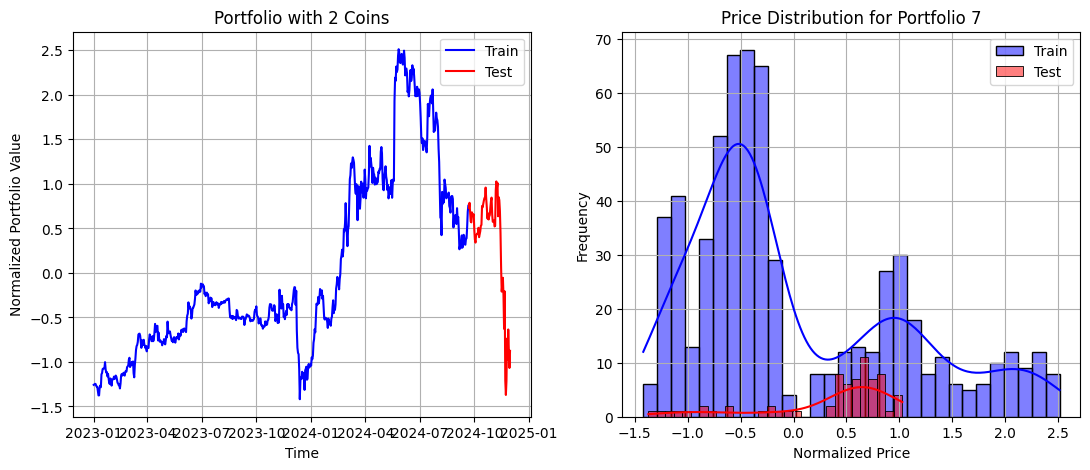

Eigenvector for Portfolio 8 ('bnb', 'sol') with 2 coins:
[ 0.03155823 -0.10338739]


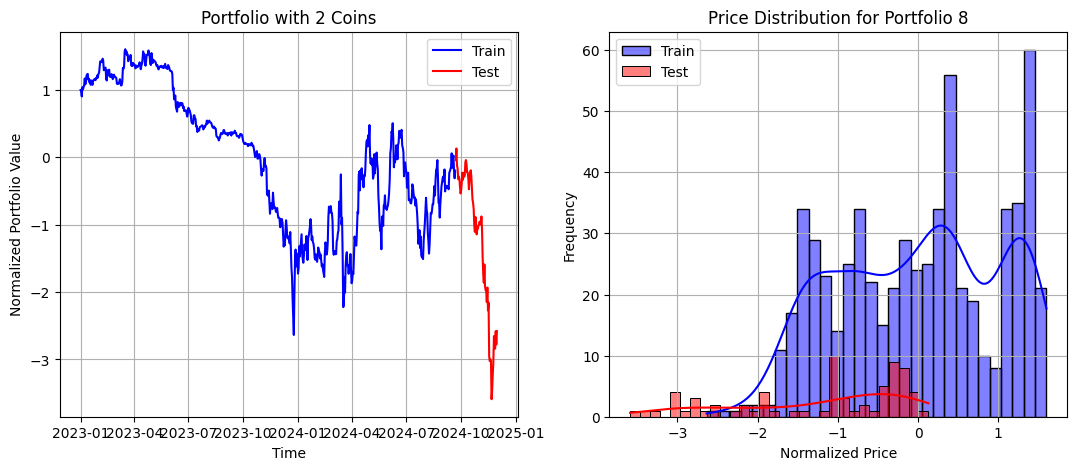

Eigenvector for Portfolio 9 ('bnb', 'ada') with 2 coins:
[  0.01385763 -12.87794663]


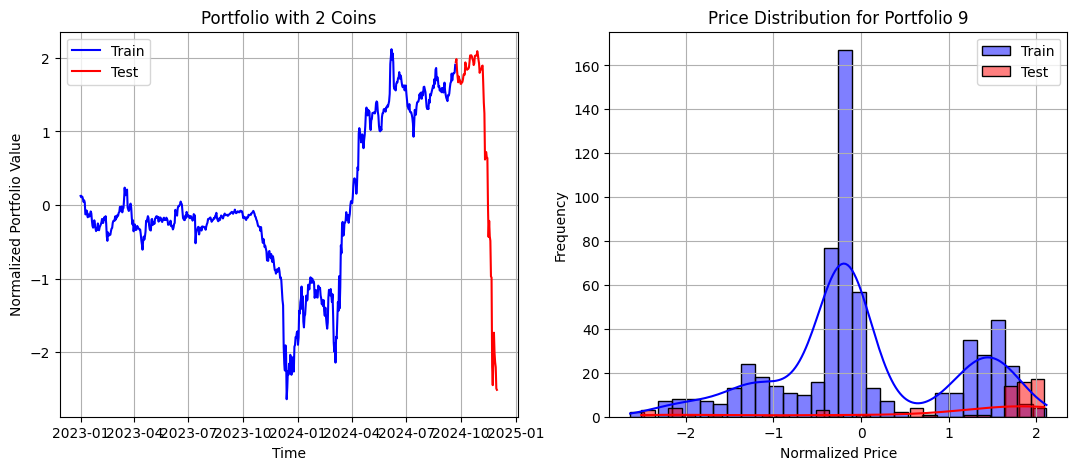

Eigenvector for Portfolio 10 ('sol', 'ada') with 2 coins:
[  0.06369632 -22.6909983 ]


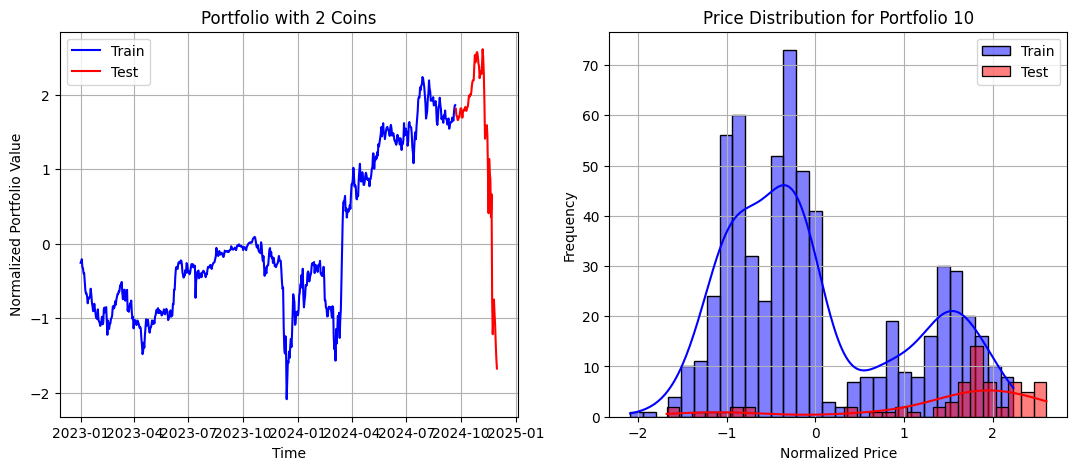

Eigenvector for Portfolio 11 ('btc', 'eth', 'bnb') with 3 coins:
[ 0.00115822 -0.01564876 -0.02061197]


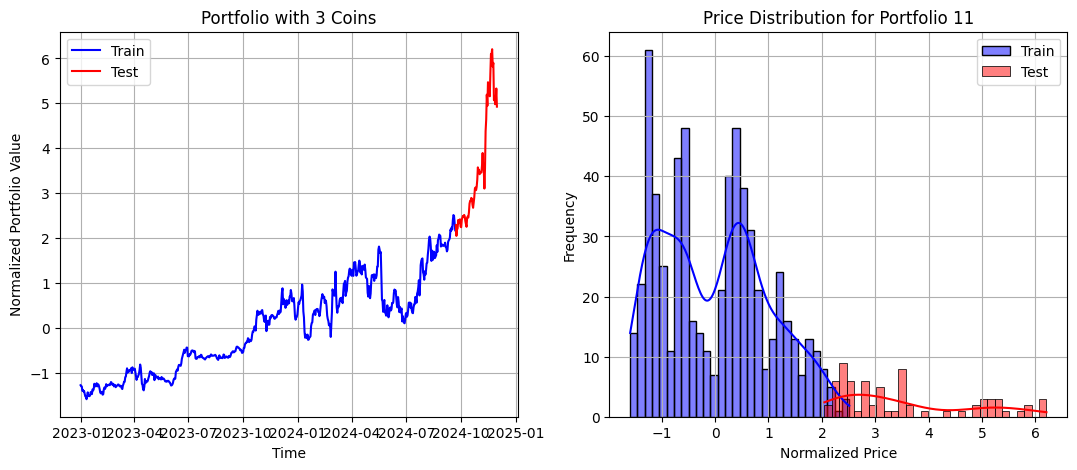

Eigenvector for Portfolio 12 ('btc', 'eth', 'sol') with 3 coins:
[ 0.00098296 -0.01670735 -0.00848801]


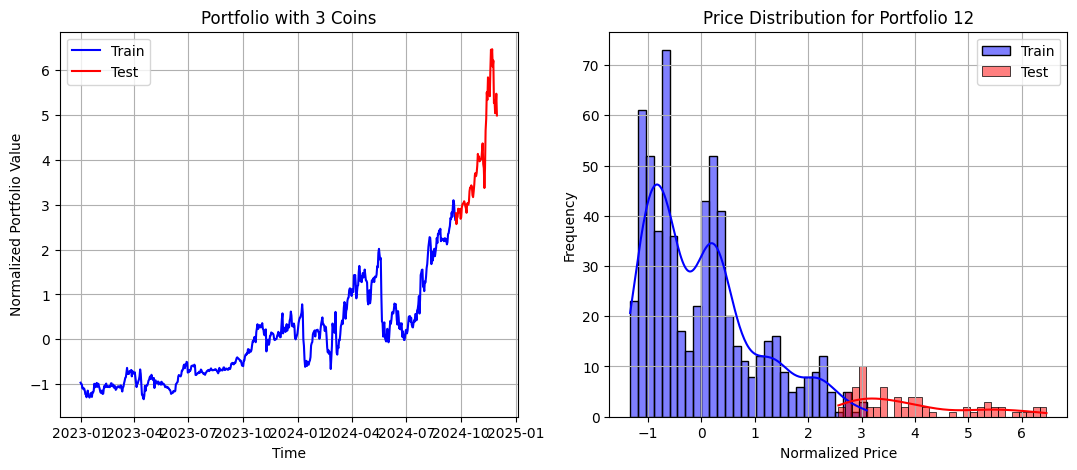

Eigenvector for Portfolio 13 ('btc', 'eth', 'ada') with 3 coins:
[ 4.23593680e-04 -1.25055204e-02  1.46452184e+01]


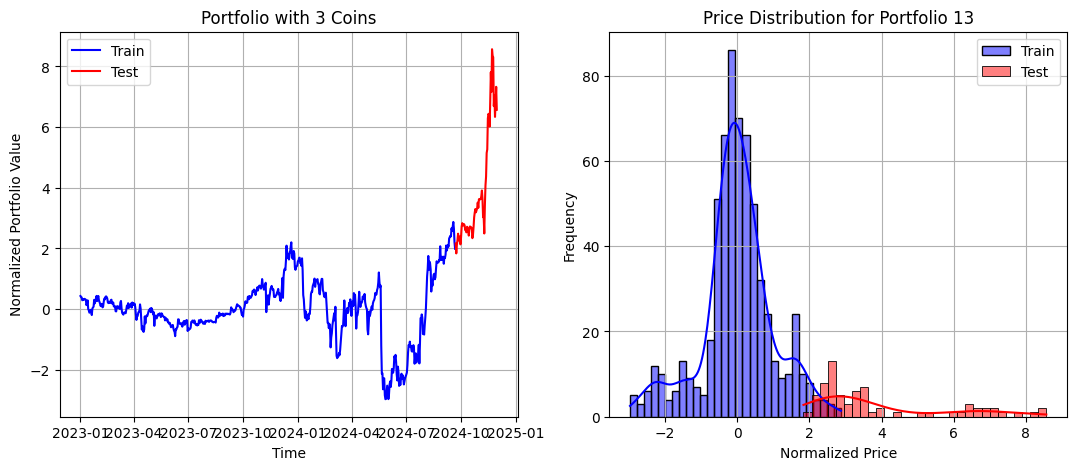

Eigenvector for Portfolio 14 ('btc', 'bnb', 'sol') with 3 coins:
[ 0.00035374  0.03054887 -0.18222662]


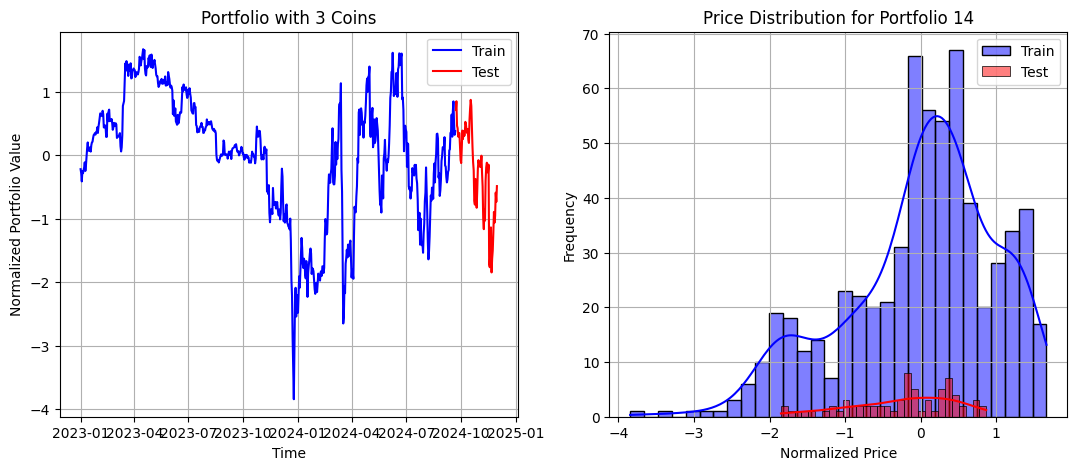

Eigenvector for Portfolio 15 ('btc', 'bnb', 'ada') with 3 coins:
[ 5.99739671e-04 -1.81825160e-02 -2.57921090e+01]


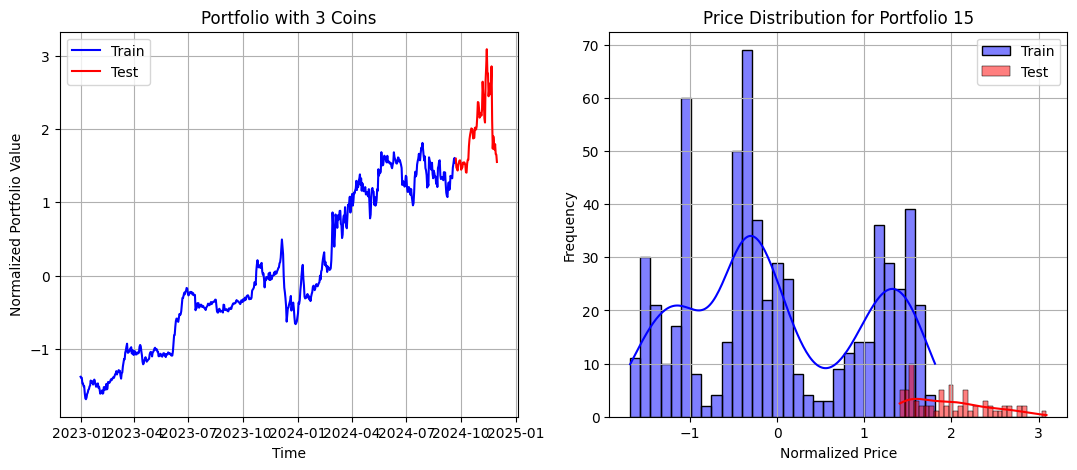

Eigenvector for Portfolio 16 ('btc', 'sol', 'ada') with 3 coins:
[ 5.99412252e-04 -8.32698299e-02 -1.72779434e+01]


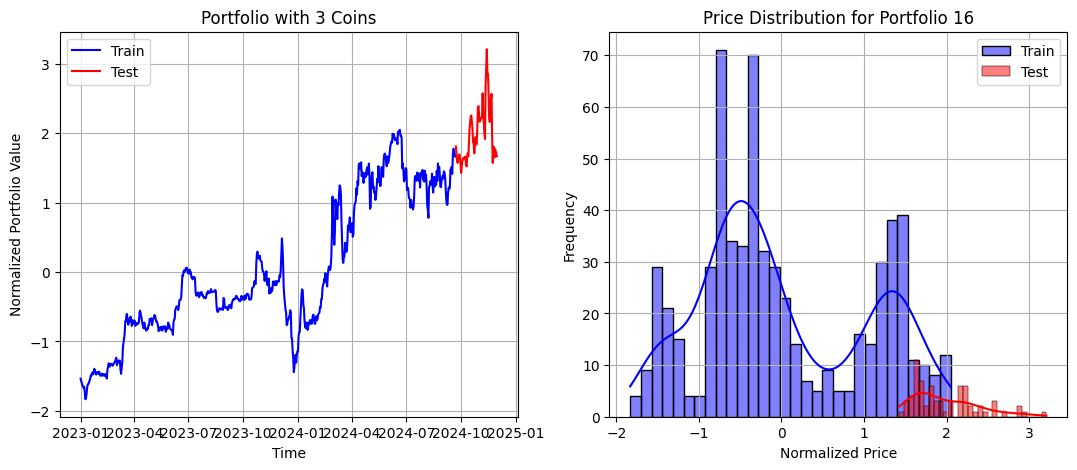

Eigenvector for Portfolio 17 ('eth', 'bnb', 'sol') with 3 coins:
[ 0.00433141  0.02953275 -0.14475887]


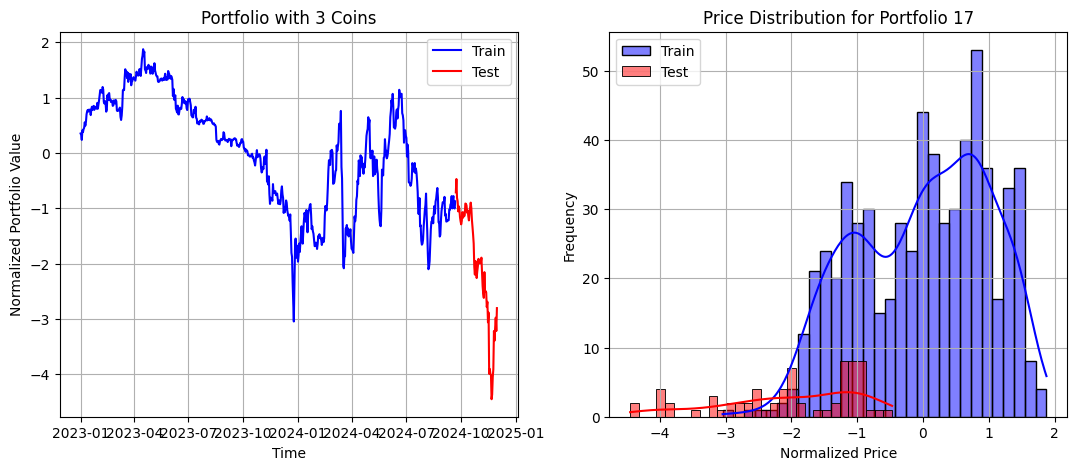

Eigenvector for Portfolio 18 ('eth', 'bnb', 'ada') with 3 coins:
[ 7.85638486e-03 -8.22371865e-03 -2.21244036e+01]


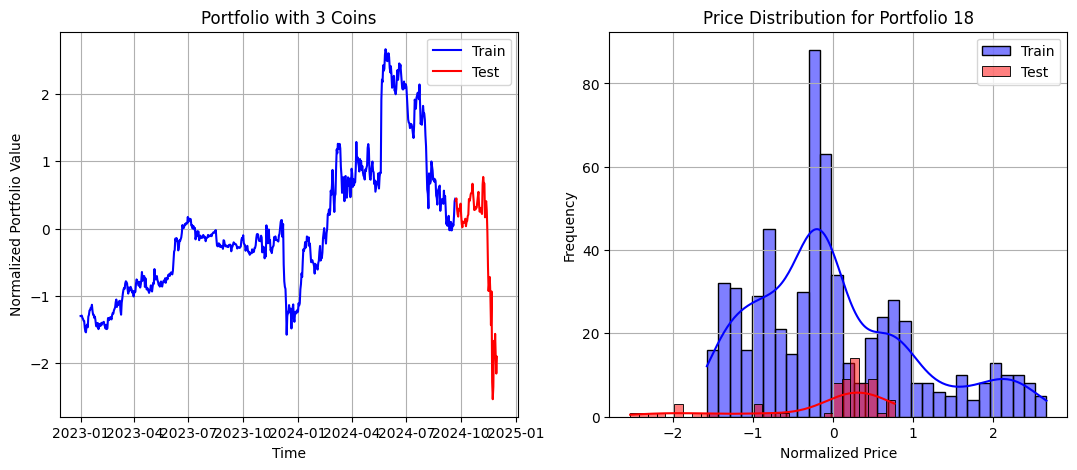

Eigenvector for Portfolio 19 ('eth', 'sol', 'ada') with 3 coins:
[ 9.28892227e-03 -5.00966922e-02 -1.84928273e+01]


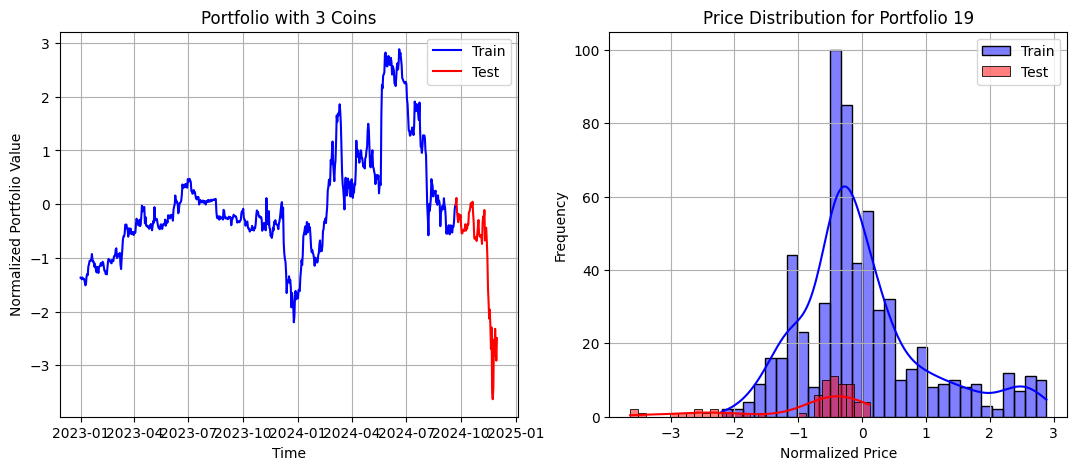

Eigenvector for Portfolio 20 ('bnb', 'sol', 'ada') with 3 coins:
[ 0.0367295  -0.13207642  3.64167092]


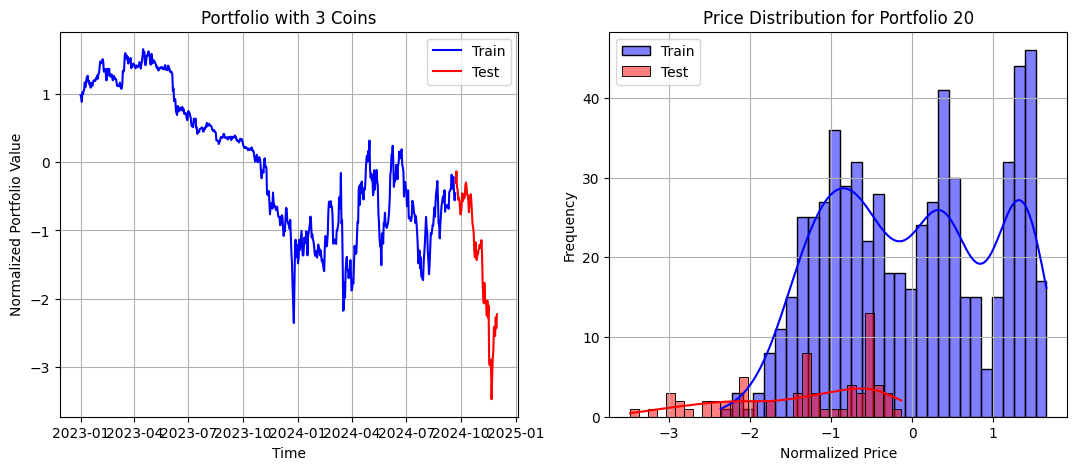

Eigenvector for Portfolio 21 ('btc', 'eth', 'bnb', 'sol') with 4 coins:
[ 0.00090214 -0.01204368 -0.04024325  0.06756291]


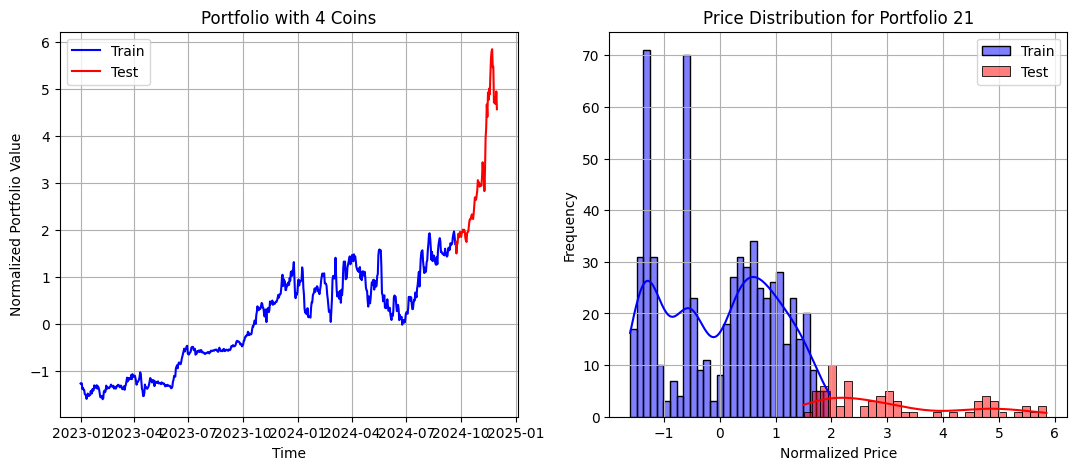

Eigenvector for Portfolio 22 ('btc', 'eth', 'bnb', 'ada') with 4 coins:
[ 4.17630514e-04 -1.29316986e-02  5.12616582e-04  1.80594033e+01]


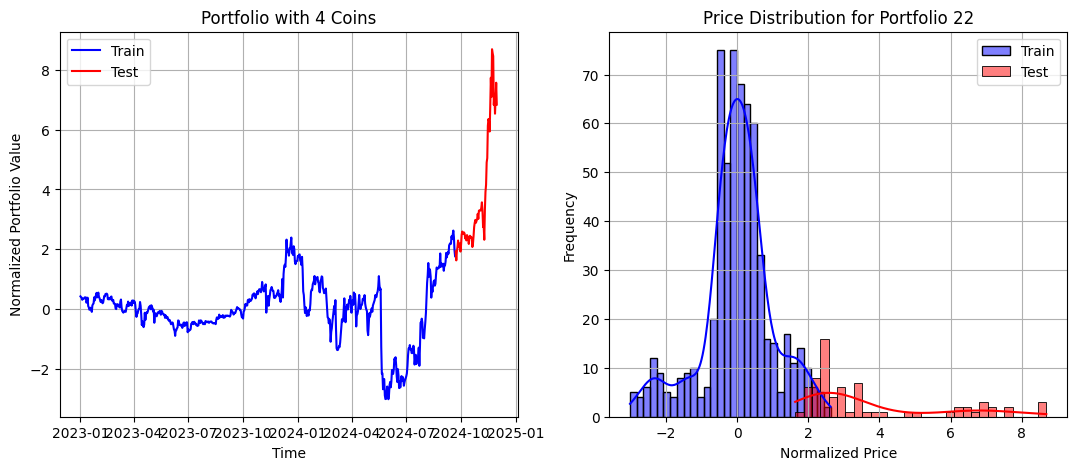

Eigenvector for Portfolio 23 ('btc', 'eth', 'sol', 'ada') with 4 coins:
[ 6.06590451e-04 -1.89299195e-02  4.12451837e-02  1.38148834e+01]


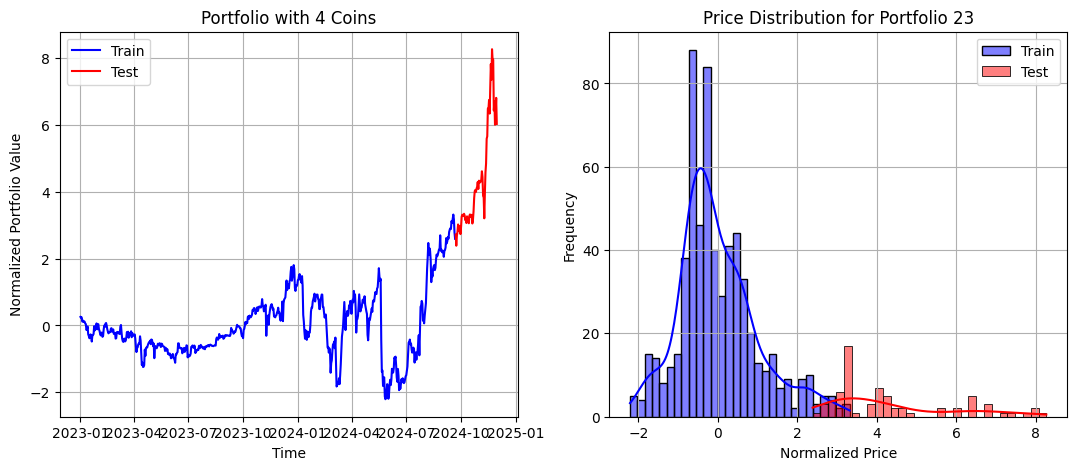

Eigenvector for Portfolio 24 ('btc', 'bnb', 'sol', 'ada') with 4 coins:
[ 8.36020509e-04  7.04707064e-04 -1.52878137e-01 -1.53241293e+01]


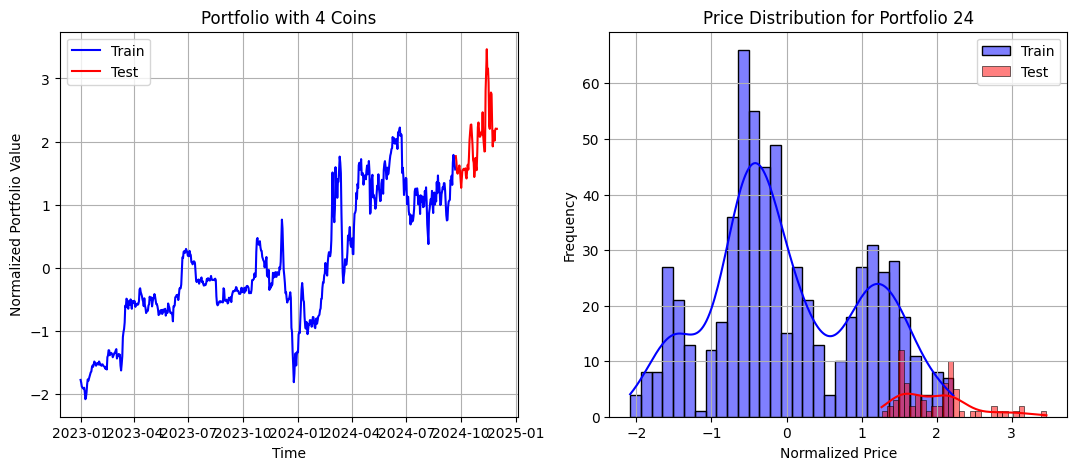

Eigenvector for Portfolio 25 ('eth', 'bnb', 'sol', 'ada') with 4 coins:
[ 1.20791618e-02  5.64825766e-03 -1.17522032e-01 -1.53843936e+01]


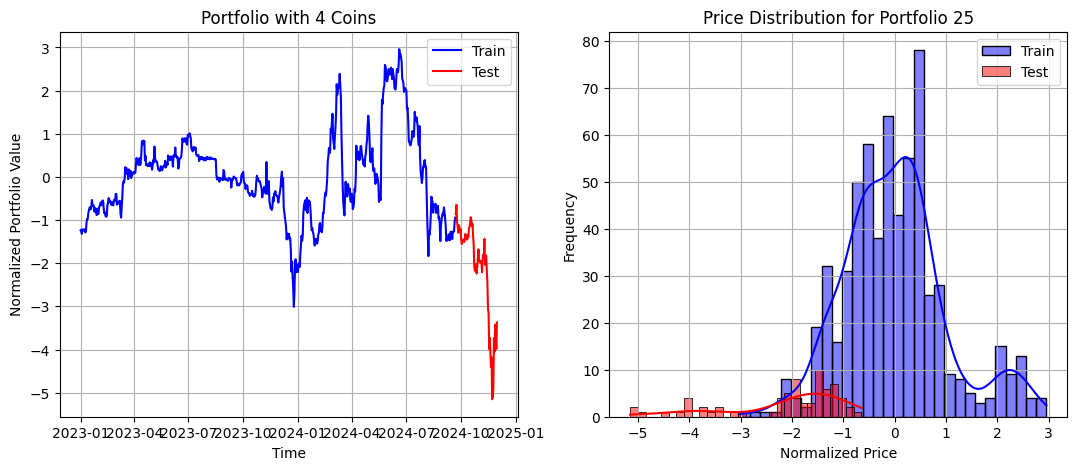

Eigenvector for Portfolio 26 ('btc', 'eth', 'bnb', 'sol', 'ada') with 5 coins:
[ 8.04275149e-04 -2.33947294e-02 -8.67995721e-04  5.66971452e-02
  1.28868440e+01]


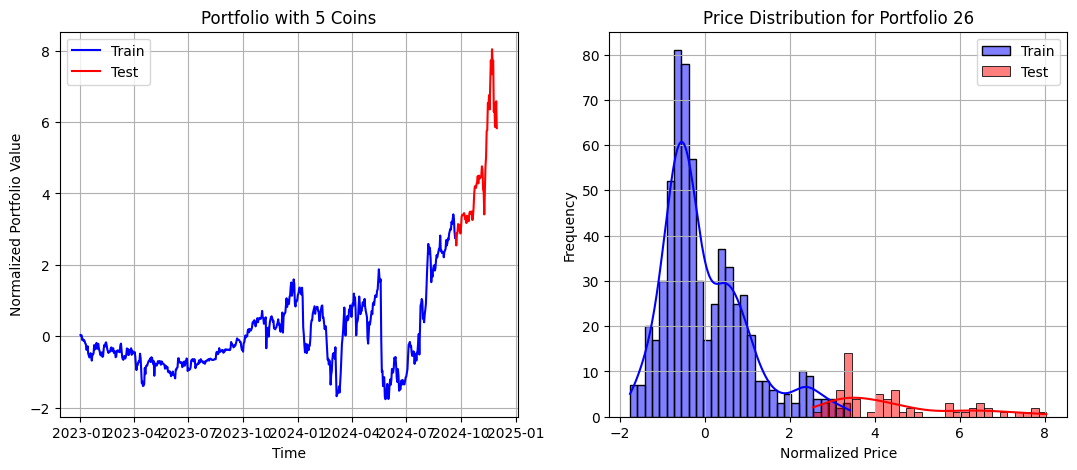

In [12]:
for i, coins in enumerate(coins_list, start=1):
    # Extract closing prices
    price_matrix_train = train_data.loc[:, coins].to_numpy()
    price_matrix_test = test_data.loc[:, coins].to_numpy()

    # Perform Johansen Cointegration Test
    johansen_test = coint_johansen(price_matrix_train, det_order=1, k_ar_diff=60)
    cointegration_vector = johansen_test.evec[:, 0]

    # Print eigenvector for each case
    print(f"Eigenvector for Portfolio {i} {coins} with {len(coins)} coins:")
    print(cointegration_vector)

    # Create portfolios
    portfolio_train = price_matrix_train @ cointegration_vector
    portfolio_test = price_matrix_test @ cointegration_vector

    # Normalize portfolios
    normalized_portfolio_train = (portfolio_train - np.mean(portfolio_train)) / np.std(portfolio_train)
    normalized_portfolio_test = (portfolio_test - np.mean(portfolio_train)) / np.std(portfolio_train)

    train_data[f"portfolio_{i}"] = normalized_portfolio_train
    test_data[f"portfolio_{i}"] = normalized_portfolio_test

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    axes = axes.flatten()

    ax1 = axes[0]
    ax1.plot(train_data.index, train_data.loc[:, f"portfolio_{i}"], label="Train", color="blue")
    ax1.plot(test_data.index, test_data.loc[:, f"portfolio_{i}"], label="Test", color="red")
    ax1.set_title(f"Portfolio with {len(coins)} Coins")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Normalized Portfolio Value")
    ax1.legend()
    ax1.grid()

     # Visualize distribution of portfolio prices
    ax2 = axes[1]
    sns.histplot(normalized_portfolio_train, bins=30, kde=True, color="blue", label="Train", ax=ax2)
    sns.histplot(normalized_portfolio_test, bins=30, kde=True, color="red", label="Test", ax=ax2)
    ax2.set_title(f"Price Distribution for Portfolio {i}")
    ax2.set_xlabel("Normalized Price")
    ax2.set_ylabel("Frequency")
    ax2.legend()
    ax2.grid()
        
    plt.show()